In [1]:
import sympy as sp

In [2]:
import sympy.physics.units.quantities as sq

In [3]:
from sympy.physics.quantum.constants import hbar

In [4]:
from custom_libraries.stepper import *

In [5]:
from custom_libraries.schrodinger import *

In [6]:
def real_harmonics( _ ):
    assumptions = standard_harmonic_assumptions( _ );
    print( assumptions )
    assumptions.update( { 'real' : True } )
    return assumptions

In [7]:
stairwell_solver = TimeIndependentSchrodingerConstantPotentials1D( 
        StairWell.default_non_uniform_length_potential_table(), 
        tuple( StairWell.default_non_uniform_length_potential_table().keys() )[ -1 ], 
        make_psis = make_psi_numbered, 
        harmonics_assumptions = real_harmonics, 
        repeating = True, 
        #as_distances = True, 
        as_distances = False, 
        #normalization_conjugate_not_squared_absolute_value = False
    )

{'finite': True, 'nonzero': True}
{'finite': True, 'nonzero': True}
{'finite': True, 'nonzero': True}


In [8]:
display_steps( stairwell_solver.equations )

Eq(-k_0**2*\psi_{0}(x) + Derivative(\psi_{0}(x), (x, 2)), 0)

Eq(-k_1**2*\psi_{1}(x) + Derivative(\psi_{1}(x), (x, 2)), 0)

Eq(-k_2**2*\psi_{2}(x) + Derivative(\psi_{2}(x), (x, 2)), 0)

In [9]:
display_in( stairwell_solver.harmonic_constants )

Eq(k_0, sqrt(2)*sqrt(m)*sqrt(-E + V_0)/hbar)

Eq(k_1, sqrt(2)*sqrt(m)*sqrt(-E + V_1)/hbar)

Eq(k_2, sqrt(2)*sqrt(m)*sqrt(-E + V_2)/hbar)

In [10]:
stairwell_solver.boundries.boundries

{'ContinuityConditions': {\psi_{0}(L_0): \psi_{1}(L_0),
  \psi_{1}(L_1): \psi_{2}(L_1)},
 'RepeatingPotentialsCondition': {\psi_{0}(0): \psi_{2}(L_2)}}

In [11]:
stairwell_solver.boundries.ContinuityConditions

{\psi_{0}(L_0): \psi_{1}(L_0), \psi_{1}(L_1): \psi_{2}(L_1)}

In [12]:
stairwell_solver.boundries.RepeatingPotentialsCondition

{\psi_{0}(0): \psi_{2}(L_2)}

In [13]:
stairwell_solver.boundries.update_all_boundry_conditions()

('LastUpdatedAllBoundryConditions',
 {\psi_{0}(L_0): \psi_{1}(L_0),
  \psi_{1}(L_1): \psi_{2}(L_1),
  \psi_{0}(0): \psi_{2}(L_2)})

In [14]:
list( stairwell_solver.boundries.update_all_boundry_conditions()[ 1 ].keys() )

[\psi_{0}(L_0), \psi_{1}(L_1), \psi_{0}(0)]

In [15]:
stairwell_solver.boundries.display()

'ContinuityConditions'

Eq(\psi_{0}(L_0), \psi_{1}(L_0))

Eq(\psi_{1}(L_1), \psi_{2}(L_1))

'RepeatingPotentialsCondition'

Eq(\psi_{0}(0), \psi_{2}(L_2))

'LastUpdatedAllBoundryConditions'

Eq(\psi_{0}(L_0), \psi_{1}(L_0))

Eq(\psi_{1}(L_1), \psi_{2}(L_1))

Eq(\psi_{0}(0), \psi_{2}(L_2))

In [16]:
stairwell_solver.equations[ 0 ].last_step()

Eq(-k_0**2*\psi_{0}(x) + Derivative(\psi_{0}(x), (x, 2)), 0)

In [17]:
solutions = stairwell_solver.solve_odes()

In [18]:
display_in( solutions )

Eq(\psi_{0}(x), (-\psi_{1}(L_0)*exp(L_0*k_0)/(exp(2*L_0*k_0) - 1) + \psi_{2}(L_2)*exp(2*L_0*k_0)/(exp(2*L_0*k_0) - 1))*exp(-k_0*x) + (\psi_{1}(L_0)*exp(L_0*k_0)/(exp(2*L_0*k_0) - 1) - \psi_{2}(L_2)/(exp(2*L_0*k_0) - 1))*exp(k_0*x))

Eq(\psi_{1}(x), (\psi_{0}(L_0)*exp(L_0*k_1)/(exp(2*L_0*k_1) - exp(2*L_1*k_1)) - \psi_{2}(L_1)*exp(L_1*k_1)/(exp(2*L_0*k_1) - exp(2*L_1*k_1)))*exp(k_1*x) + (-\psi_{0}(L_0)*exp(L_0*k_1)*exp(2*L_1*k_1)/(exp(2*L_0*k_1) - exp(2*L_1*k_1)) + \psi_{2}(L_1)*exp(2*L_0*k_1)*exp(L_1*k_1)/(exp(2*L_0*k_1) - exp(2*L_1*k_1)))*exp(-k_1*x))

Eq(\psi_{2}(x), (-\psi_{0}(0)*exp(L_2*k_2)/(exp(2*L_1*k_2) - exp(2*L_2*k_2)) + \psi_{1}(L_1)*exp(L_1*k_2)/(exp(2*L_1*k_2) - exp(2*L_2*k_2)))*exp(k_2*x) + (\psi_{0}(0)*exp(2*L_1*k_2)*exp(L_2*k_2)/(exp(2*L_1*k_2) - exp(2*L_2*k_2)) - \psi_{1}(L_1)*exp(L_1*k_2)*exp(2*L_2*k_2)/(exp(2*L_1*k_2) - exp(2*L_2*k_2)))*exp(-k_2*x))

In [19]:
stairwell_solver.substitute_wave_functions_into_normalizations()

In [20]:
stairwell_solver.boundries_in_expression_to_constants()

([<custom_libraries.stepper.Stepper at 0x7feb7d6ebee0>,
 {'Before': [['TimeIndependentSchrodingerConstantPotentials1DCheckPointBeforeBoundryToConstantSubstitution105',
    'TimeIndependentSchrodingerConstantPotentials1DCheckPointBeforeBoundryToConstantSubstitution105',
    'TimeIndependentSchrodingerConstantPotentials1DCheckPointBeforeBoundryToConstantSubstitution105'],
   ['TimeIndependentSchrodingerConstantPotentials1DCheckPointBeforeBoundryToConstantSubstitution105',
    'TimeIndependentSchrodingerConstantPotentials1DCheckPointBeforeBoundryToConstantSubstitution105',
    'TimeIndependentSchrodingerConstantPotentials1DCheckPointBeforeBoundryToConstantSubstitution105']],
  'Post': [['TimeIndependentSchrodingerConstantPotentials1DCheckPointPostBoundryToConstantSubstitution112',
    'TimeIndependentSchrodingerConstantPotentials1DCheckPointPostBoundryToConstantSubstitution112',
    'TimeIndependentSchrodingerConstantPotentials1DCheckPointPostBoundryToConstantSubstitution112'],
   ['TimeI

In [21]:
display_steps( stairwell_solver.equations )

Eq(\psi_{0}(x), (-B_{0}*exp(L_0*k_0)/(exp(2*L_0*k_0) - 1) + B_{2}*exp(2*L_0*k_0)/(exp(2*L_0*k_0) - 1))*exp(-k_0*x) + (B_{0}*exp(L_0*k_0)/(exp(2*L_0*k_0) - 1) - B_{2}/(exp(2*L_0*k_0) - 1))*exp(k_0*x))

Eq(\psi_{1}(x), (B_{0}*exp(L_0*k_1)/(exp(2*L_0*k_1) - exp(2*L_1*k_1)) - B_{1}*exp(L_1*k_1)/(exp(2*L_0*k_1) - exp(2*L_1*k_1)))*exp(k_1*x) + (-B_{0}*exp(L_0*k_1)*exp(2*L_1*k_1)/(exp(2*L_0*k_1) - exp(2*L_1*k_1)) + B_{1}*exp(2*L_0*k_1)*exp(L_1*k_1)/(exp(2*L_0*k_1) - exp(2*L_1*k_1)))*exp(-k_1*x))

Eq(\psi_{2}(x), (B_{1}*exp(L_1*k_2)/(exp(2*L_1*k_2) - exp(2*L_2*k_2)) - B_{2}*exp(L_2*k_2)/(exp(2*L_1*k_2) - exp(2*L_2*k_2)))*exp(k_2*x) + (-B_{1}*exp(L_1*k_2)*exp(2*L_2*k_2)/(exp(2*L_1*k_2) - exp(2*L_2*k_2)) + B_{2}*exp(2*L_1*k_2)*exp(L_2*k_2)/(exp(2*L_1*k_2) - exp(2*L_2*k_2)))*exp(-k_2*x))

In [22]:
display_steps( stairwell_solver.normalizations )

Eq(Integral(((-B_{0}*exp(L_0*k_0)/(exp(2*L_0*k_0) - 1) + B_{2}*exp(2*L_0*k_0)/(exp(2*L_0*k_0) - 1))*exp(-k_0*x) + (B_{0}*exp(L_0*k_0)/(exp(2*L_0*k_0) - 1) - B_{2}/(exp(2*L_0*k_0) - 1))*exp(k_0*x))*((exp(L_0*k_0)*conjugate(B_{0})/(exp(2*L_0*k_0) - 1) - conjugate(B_{2})/(exp(2*L_0*k_0) - 1))*exp(k_0*x) + (exp(2*L_0*k_0)*conjugate(B_{2})/(exp(2*L_0*k_0) - 1) - exp(L_0*k_0)*conjugate(B_{0})/(exp(2*L_0*k_0) - 1))*exp(-k_0*x)), (x, 0, L_0)), N_0)

Eq(Integral(((B_{0}*exp(L_0*k_1)/(exp(2*L_0*k_1) - exp(2*L_1*k_1)) - B_{1}*exp(L_1*k_1)/(exp(2*L_0*k_1) - exp(2*L_1*k_1)))*exp(k_1*x) + (-B_{0}*exp(L_0*k_1)*exp(2*L_1*k_1)/(exp(2*L_0*k_1) - exp(2*L_1*k_1)) + B_{1}*exp(2*L_0*k_1)*exp(L_1*k_1)/(exp(2*L_0*k_1) - exp(2*L_1*k_1)))*exp(-k_1*x))*((exp(L_0*k_1)*conjugate(B_{0})/(exp(2*L_0*k_1) - exp(2*L_1*k_1)) - exp(L_1*k_1)*conjugate(B_{1})/(exp(2*L_0*k_1) - exp(2*L_1*k_1)))*exp(k_1*x) + (exp(2*L_0*k_1)*exp(L_1*k_1)*conjugate(B_{1})/(exp(2*L_0*k_1) - exp(2*L_1*k_1)) - exp(L_0*k_1)*exp(2*L_1*k_1)*conjugate(B_{0})/(exp(2*L_0*k_1) - exp(2*L_1*k_1)))*exp(-k_1*x)), (x, L_0, L_1)), N_1)

Eq(Integral(((B_{1}*exp(L_1*k_2)/(exp(2*L_1*k_2) - exp(2*L_2*k_2)) - B_{2}*exp(L_2*k_2)/(exp(2*L_1*k_2) - exp(2*L_2*k_2)))*exp(k_2*x) + (-B_{1}*exp(L_1*k_2)*exp(2*L_2*k_2)/(exp(2*L_1*k_2) - exp(2*L_2*k_2)) + B_{2}*exp(2*L_1*k_2)*exp(L_2*k_2)/(exp(2*L_1*k_2) - exp(2*L_2*k_2)))*exp(-k_2*x))*((exp(L_1*k_2)*conjugate(B_{1})/(exp(2*L_1*k_2) - exp(2*L_2*k_2)) - exp(L_2*k_2)*conjugate(B_{2})/(exp(2*L_1*k_2) - exp(2*L_2*k_2)))*exp(k_2*x) + (exp(2*L_1*k_2)*exp(L_2*k_2)*conjugate(B_{2})/(exp(2*L_1*k_2) - exp(2*L_2*k_2)) - exp(L_1*k_2)*exp(2*L_2*k_2)*conjugate(B_{1})/(exp(2*L_1*k_2) - exp(2*L_2*k_2)))*exp(-k_2*x)), (x, L_1, L_2)), N_2)

In [23]:
k_0 = stairwell_solver.harmonic_constants[ 0 ].lhs

In [24]:
k_0

k_0

In [25]:
harmonic_0_assumptions = sp.Q.lt( k_0, sp.oo ) & sp.Q.gt( k_0, -sp.oo ) & sp.Q.nonzero( k_0 )

In [26]:
harmonic_0_assumptions

Q.nonzero(k_0) & Q.gt(k_0, -oo) & Q.lt(k_0, oo)

In [27]:
stairwell_solver.normalizations[ 0 ].last_step().simplify().doit().simplify().refine()

Eq(N_0, Piecewise(((L_0*k_0*(exp(2*L_0*k_0) - 1)*(B_{0}*exp(2*L_0*k_0)*conjugate(B_{2}) - 2*B_{0}*exp(L_0*k_0)*conjugate(B_{0}) + B_{0}*conjugate(B_{2}) + B_{2}*exp(2*L_0*k_0)*conjugate(B_{0}) - 2*B_{2}*exp(L_0*k_0)*conjugate(B_{2}) + B_{2}*conjugate(B_{0}))*exp(L_0*k_0) + (exp(4*L_0*k_0) - 2*exp(2*L_0*k_0) + 1)*(B_{0}*exp(2*L_0*k_0)*conjugate(B_{0}) - 2*B_{0}*exp(L_0*k_0)*conjugate(B_{2}) + B_{0}*conjugate(B_{0}) + B_{2}*exp(2*L_0*k_0)*conjugate(B_{2}) - 2*B_{2}*exp(L_0*k_0)*conjugate(B_{0}) + B_{2}*conjugate(B_{2}))/2)/(k_0*(exp(2*L_0*k_0) - 1)*(exp(4*L_0*k_0) - 2*exp(2*L_0*k_0) + 1)), Ne(k_0**2*(exp(8*L_0*k_0) - 4*exp(6*L_0*k_0) + 6*exp(4*L_0*k_0) - 4*exp(2*L_0*k_0) + 1), 0)), (B_{2}*L_0*conjugate(B_{2}), True)))

In [28]:
abc = stairwell_solver.normalizations[ 0 ].last_step().simplify().doit().simplify().refine()

In [53]:
trouble_denom = abc.rhs.args[ 0 ][ 1 ]

In [59]:
trouble_denom_effective = trouble_denom.lhs.as_two_terms()[ 1 ]

In [60]:
trouble_denom_effective

exp(8*L_0*k_0) - 4*exp(6*L_0*k_0) + 6*exp(4*L_0*k_0) - 4*exp(2*L_0*k_0) + 1

In [61]:
test_input = stairwell_solver.regions()[ 0 ] * stairwell_solver.harmonic_constants[ 0 ].lhs

In [62]:
test_input

L_0*k_0

In [63]:
numerical_indpendant_x = sp.Symbol( 'x', real=True ) 

In [64]:
trouble_denom_effective = trouble_denom_effective.subs( test_input, numerical_indpendant_x )

In [65]:
trouble_denom_effective

exp(8*x) - 4*exp(6*x) + 6*exp(4*x) - 4*exp(2*x) + 1

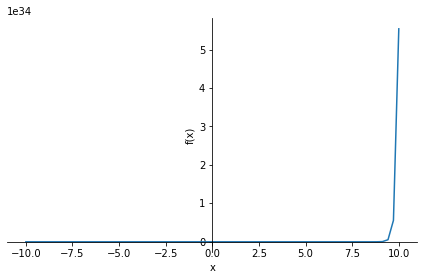

In [66]:
sp.plot(trouble_denom_effective)

In [68]:
trouble_denom_effective_numerical = sp.lambdify( numerical_indpendant_x, trouble_denom_effective )

In [69]:
trouble_denom_effective_numerical( 0 )

0.0

In [70]:
trouble_denom_effective_numerical( 1 )

1666.2754888739307

In [29]:
test = stairwell_solver.normalizations[ 0 ].last_step().expand()

In [30]:
test

Eq(Integral(B_{0}*exp(2*L_0*k_0)*conjugate(B_{0})/(exp(4*L_0*k_0)*exp(2*k_0*x) - 2*exp(2*L_0*k_0)*exp(2*k_0*x) + exp(2*k_0*x)), (x, 0, L_0)) + Integral(-B_{0}*exp(3*L_0*k_0)*conjugate(B_{2})/(exp(4*L_0*k_0)*exp(2*k_0*x) - 2*exp(2*L_0*k_0)*exp(2*k_0*x) + exp(2*k_0*x)), (x, 0, L_0)) + Integral(B_{0}*exp(L_0*k_0)*conjugate(B_{2})/(exp(4*L_0*k_0) - 2*exp(2*L_0*k_0) + 1), (x, 0, L_0)) + Integral(-2*B_{0}*exp(2*L_0*k_0)*conjugate(B_{0})/(exp(4*L_0*k_0) - 2*exp(2*L_0*k_0) + 1), (x, 0, L_0)) + Integral(B_{0}*exp(3*L_0*k_0)*conjugate(B_{2})/(exp(4*L_0*k_0) - 2*exp(2*L_0*k_0) + 1), (x, 0, L_0)) + Integral(-B_{2}*exp(3*L_0*k_0)*conjugate(B_{0})/(exp(4*L_0*k_0)*exp(2*k_0*x) - 2*exp(2*L_0*k_0)*exp(2*k_0*x) + exp(2*k_0*x)), (x, 0, L_0)) + Integral(B_{2}*exp(4*L_0*k_0)*conjugate(B_{2})/(exp(4*L_0*k_0)*exp(2*k_0*x) - 2*exp(2*L_0*k_0)*exp(2*k_0*x) + exp(2*k_0*x)), (x, 0, L_0)) + Integral(B_{2}*exp(L_0*k_0)*conjugate(B_{0})/(exp(4*L_0*k_0) - 2*exp(2*L_0*k_0) + 1), (x, 0, L_0)) + Integral(-2*B_{2}*exp(2*

In [31]:
test = Stepper( test.simplify() )

In [32]:
test.operate( lambda step : step.subs( { step.lhs : .02 } ) )

Eq(0.02, (B_{0}*L_0*exp(3*L_0*k_0)*conjugate(B_{2}) - 2*B_{0}*L_0*exp(2*L_0*k_0)*conjugate(B_{0}) + B_{0}*L_0*exp(L_0*k_0)*conjugate(B_{2}) - B_{0}*(1/(2*k_0) - exp(-2*L_0*k_0)/(2*k_0))*exp(3*L_0*k_0)*conjugate(B_{2}) + B_{0}*(1/(2*k_0) - exp(-2*L_0*k_0)/(2*k_0))*exp(2*L_0*k_0)*conjugate(B_{0}) + B_{0}*(exp(2*L_0*k_0)/(2*k_0) - 1/(2*k_0))*exp(2*L_0*k_0)*conjugate(B_{0}) - B_{0}*(exp(2*L_0*k_0)/(2*k_0) - 1/(2*k_0))*exp(L_0*k_0)*conjugate(B_{2}) + B_{2}*L_0*exp(3*L_0*k_0)*conjugate(B_{0}) - 2*B_{2}*L_0*exp(2*L_0*k_0)*conjugate(B_{2}) + B_{2}*L_0*exp(L_0*k_0)*conjugate(B_{0}) + B_{2}*(1/(2*k_0) - exp(-2*L_0*k_0)/(2*k_0))*exp(4*L_0*k_0)*conjugate(B_{2}) - B_{2}*(1/(2*k_0) - exp(-2*L_0*k_0)/(2*k_0))*exp(3*L_0*k_0)*conjugate(B_{0}) - B_{2}*(exp(2*L_0*k_0)/(2*k_0) - 1/(2*k_0))*exp(L_0*k_0)*conjugate(B_{0}) + B_{2}*(exp(2*L_0*k_0)/(2*k_0) - 1/(2*k_0))*conjugate(B_{2}))/(exp(4*L_0*k_0) - 2*exp(2*L_0*k_0) + 1))

In [33]:
B_0 = test.symbols().B__0_

In [34]:
solve_B_0 = test.new_solution_set( str( B_0 ) )

In [35]:
B_0_solution = sp.solve( solve_B_0[ 0 ].last_step(), B_0 )

In [36]:
B_0_solution[ 0 ]

0.2*(10.0*B_{2}*(L_0*k_0*exp(2.0*L_0*k_0) + L_0*k_0 - exp(2.0*L_0*k_0) + 1.0)*exp(L_0*k_0) - 10.0*(1.0 - exp(L_0*k_0))*(exp(L_0*k_0) + 1.0)*sqrt(B_{2}**2*L_0**2*k_0**2*exp(2.0*L_0*k_0) + 0.5*B_{2}**2*exp(2.0*L_0*k_0) - 0.25*B_{2}**2*exp(4.0*L_0*k_0) - 0.25*B_{2}**2 - 0.04*L_0*k_0**2*exp(2.0*L_0*k_0) + 0.01*k_0*exp(4.0*L_0*k_0) - 0.01*k_0))/(4.0*L_0*k_0*exp(2.0*L_0*k_0) - exp(4.0*L_0*k_0) + 1.0)

In [37]:
B_0_solution[ 1 ]

0.2*(10.0*B_{2}*(L_0*k_0*exp(2.0*L_0*k_0) + L_0*k_0 - exp(2.0*L_0*k_0) + 1.0)*exp(L_0*k_0) + 10.0*(1.0 - exp(L_0*k_0))*(exp(L_0*k_0) + 1.0)*sqrt(B_{2}**2*L_0**2*k_0**2*exp(2.0*L_0*k_0) + 0.5*B_{2}**2*exp(2.0*L_0*k_0) - 0.25*B_{2}**2*exp(4.0*L_0*k_0) - 0.25*B_{2}**2 - 0.04*L_0*k_0**2*exp(2.0*L_0*k_0) + 0.01*k_0*exp(4.0*L_0*k_0) - 0.01*k_0))/(4.0*L_0*k_0*exp(2.0*L_0*k_0) - exp(4.0*L_0*k_0) + 1.0)

In [38]:
B_0_solution[ 0 ] == B_0_solution[ 1 ]

False

In [39]:
# ^^^ Subtle difference, there is a minus sign before the sqrt, this is the quadratic equation and these are the roots.

In [40]:
squared = ( B_0_solution[ 0 ] * B_0_solution[ 1 ] ).simplify().refine()

In [41]:
squared.expand().simplify().refine().cancel()

(0.25*B_{2}**2*L_0**2*k_0**2*exp(2*L_0*k_0) - 0.25*B_{2}**2*L_0**2*k_0**2*exp(2.0*L_0*k_0) + 1.0*B_{2}**2*L_0**2*k_0**2*exp(4.0*L_0*k_0) + 0.5*B_{2}**2*L_0*k_0*exp(2*L_0*k_0) - 0.5*B_{2}**2*L_0*k_0*exp(6.0*L_0*k_0) + 0.0625*B_{2}**2*exp(4*L_0*k_0) + 0.125*B_{2}**2*exp(2*L_0*k_0) - 0.125*B_{2}**2*exp(2.0*L_0*k_0) - 0.1875*B_{2}**2*exp(4.0*L_0*k_0) + 0.0625*B_{2}**2*exp(8.0*L_0*k_0) + 0.0625*B_{2}**2 + 0.01*L_0*k_0**2*exp(2.0*L_0*k_0) - 0.02*L_0*k_0**2*exp(4.0*L_0*k_0) + 0.01*L_0*k_0**2*exp(6.0*L_0*k_0) + 0.0025*k_0*exp(4*L_0*k_0) - 0.005*k_0*exp(2*L_0*k_0) - 0.0025*k_0*exp(4.0*L_0*k_0) + 0.005*k_0*exp(6.0*L_0*k_0) - 0.0025*k_0*exp(8.0*L_0*k_0) + 0.0025*k_0)/(1.0*L_0**2*k_0**2*exp(4.0*L_0*k_0) + 0.5*L_0*k_0*exp(2.0*L_0*k_0) - 0.5*L_0*k_0*exp(6.0*L_0*k_0) - 0.125*exp(4.0*L_0*k_0) + 0.0625*exp(8.0*L_0*k_0) + 0.0625)

In [42]:
# ^^^ At least its constant

In [43]:
squared

0.25*(B_{2}*(L_0*k_0*exp(2.0*L_0*k_0) + L_0*k_0 - exp(2.0*L_0*k_0) + 1.0)*exp(L_0*k_0) - (exp(L_0*k_0) - 1.0)*(exp(L_0*k_0) + 1.0)*sqrt(B_{2}**2*L_0**2*k_0**2*exp(2.0*L_0*k_0) + 0.5*B_{2}**2*exp(2.0*L_0*k_0) - 0.25*B_{2}**2*exp(4.0*L_0*k_0) - 0.25*B_{2}**2 - 0.04*L_0*k_0**2*exp(2.0*L_0*k_0) + 0.01*k_0*exp(4.0*L_0*k_0) - 0.01*k_0))*(B_{2}*(L_0*k_0*exp(2.0*L_0*k_0) + L_0*k_0 - exp(2.0*L_0*k_0) + 1.0)*exp(L_0*k_0) + (exp(L_0*k_0) - 1.0)*(exp(L_0*k_0) + 1.0)*sqrt(B_{2}**2*L_0**2*k_0**2*exp(2.0*L_0*k_0) + 0.5*B_{2}**2*exp(2.0*L_0*k_0) - 0.25*B_{2}**2*exp(4.0*L_0*k_0) - 0.25*B_{2}**2 - 0.04*L_0*k_0**2*exp(2.0*L_0*k_0) + 0.01*k_0*exp(4.0*L_0*k_0) - 0.01*k_0))/(L_0*k_0*exp(2.0*L_0*k_0) - 0.25*exp(4.0*L_0*k_0) + 0.25)**2

In [44]:
stairwell_solver.normalizations[ 0 ]

In [45]:
auto_solved = stairwell_solver.solve_boundry_constants_from_equation( stairwell_solver.normalizations[ 0 ] )

Has  B_{0}
Solutions:  [Piecewise(((2*B_{2}*(L_0*k_0*exp(2*L_0*k_0) + L_0*k_0 - exp(2*L_0*k_0) + 1)*exp(L_0*k_0) - (1 - exp(L_0*k_0))*(exp(L_0*k_0) + 1)*sqrt(4*B_{2}**2*L_0**2*k_0**2*exp(2*L_0*k_0) - B_{2}**2*exp(4*L_0*k_0) + 2*B_{2}**2*exp(2*L_0*k_0) - B_{2}**2 - 8*L_0*N_0*k_0**2*exp(2*L_0*k_0) + 2*N_0*k_0*exp(4*L_0*k_0) - 2*N_0*k_0))/(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1), Ne(k_0*(exp(4*L_0*k_0) - 2*exp(2*L_0*k_0) + 1), 0)), (nan, True)), Piecewise(((2*B_{2}*(L_0*k_0*exp(2*L_0*k_0) + L_0*k_0 - exp(2*L_0*k_0) + 1)*exp(L_0*k_0) + (1 - exp(L_0*k_0))*(exp(L_0*k_0) + 1)*sqrt(4*B_{2}**2*L_0**2*k_0**2*exp(2*L_0*k_0) - B_{2}**2*exp(4*L_0*k_0) + 2*B_{2}**2*exp(2*L_0*k_0) - B_{2}**2 - 8*L_0*N_0*k_0**2*exp(2*L_0*k_0) + 2*N_0*k_0*exp(4*L_0*k_0) - 2*N_0*k_0))/(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1), Ne(k_0*(exp(4*L_0*k_0) - 2*exp(2*L_0*k_0) + 1), 0)), (nan, True))]


B_{0}

I have sols!


Piecewise(((2*B_{2}*(L_0*k_0*exp(2*L_0*k_0) + L_0*k_0 - exp(2*L_0*k_0) + 1)*exp(L_0*k_0) - (1 - exp(L_0*k_0))*(exp(L_0*k_0) + 1)*sqrt(4*B_{2}**2*L_0**2*k_0**2*exp(2*L_0*k_0) - B_{2}**2*exp(4*L_0*k_0) + 2*B_{2}**2*exp(2*L_0*k_0) - B_{2}**2 - 8*L_0*N_0*k_0**2*exp(2*L_0*k_0) + 2*N_0*k_0*exp(4*L_0*k_0) - 2*N_0*k_0))/(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1), Ne(k_0*(exp(4*L_0*k_0) - 2*exp(2*L_0*k_0) + 1), 0)), (nan, True))

Piecewise(((2*B_{2}*(L_0*k_0*exp(2*L_0*k_0) + L_0*k_0 - exp(2*L_0*k_0) + 1)*exp(L_0*k_0) + (1 - exp(L_0*k_0))*(exp(L_0*k_0) + 1)*sqrt(4*B_{2}**2*L_0**2*k_0**2*exp(2*L_0*k_0) - B_{2}**2*exp(4*L_0*k_0) + 2*B_{2}**2*exp(2*L_0*k_0) - B_{2}**2 - 8*L_0*N_0*k_0**2*exp(2*L_0*k_0) + 2*N_0*k_0*exp(4*L_0*k_0) - 2*N_0*k_0))/(4*L_0*k_0*exp(2*L_0*k_0) - exp(4*L_0*k_0) + 1), Ne(k_0*(exp(4*L_0*k_0) - 2*exp(2*L_0*k_0) + 1), 0)), (nan, True))

Solved for  B_{0}


In [46]:
display_steps( auto_solved )

AttributeError: 'Symbol' object has no attribute 'last_step'

In [ ]:
auto_solved = stairwell_solver.solve_boundry_constants_from_equation( stairwell_solver.normalizations[ 1 ] )

In [ ]:
display_steps( auto_solved )

In [ ]:
auto_solved = stairwell_solver.solve_boundry_constants_from_equation( stairwell_solver.normalizations[ 2 ] )

In [ ]:
display_steps( auto_solved )

In [ ]:
x = 42

In [ ]:
f"""{x}"""